<center>
    <h2>CHƯƠNG 3 : HỌC CÓ GIÁM SÁT</h2>
    <h3>Phần 0 : Xác định lớp bài toàn học máy có giám sát</h3>
</center>

---

**Nội dung bài học**
1. Xác định bài toán học máy tương ứng với tập dữ liệu
2. Xác định biến độc lập (x, iến phụ thuộc (y) - Đầu vào - Đầu ra của mô hình.  -> Lớp bài toán tương ứng

## Bài toán số 1: Tập dữ liệu titanic
---

Mục tiêu: xây dựng mô hình học máy có khả năng dự đoán một hành khách được cứu hay không được cứu nếu xảy ra sự cố dựa vào các thông tin liên quan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_titanic = pd.read_csv('Data/Data_Titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [3]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027
std,0.484918,0.837836,14.413493,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


In [4]:
df_titanic.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
740,1,1,male,NaN,0,0,S


**Xác định đầu vào(x) - Đầu ra (y) của mô hình:**

- 1. Các thuộc tính đầu vào của mô hình - Biến độc lập X: bao gồm 6 thuộc tính
    * Pclass: Hạng vé
    * Sex: Giới tính
    * Age: Tuổi
    * SibSp: Anh, chị em, vợ chồng đi cùng
    * Parch: Con cái đi cùng
    * Embarrked: Cảng

- 2. Thuộc tính đầu ra - Biến phụ thuộc y: 01 thuộc tính
    * Survived: Cho biết hành kác được cứu(1) hay không được cứu(1)
    
--> Nhận xét: Tập dữ liệu titanic là tập dữ liệu có gán nhãn

In [5]:
# Tím hiểu chi tiết biến đầu ra: Survived
#Biến y: có bao nhiêu giá trị khác nhau
df_titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [6]:
#Thống kê số lượng của mỗi lớp :
df_titanic['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

**Nhận xét biến phụ thuộc Y:**
- Biến đầu ra y chỉ có 2 giá trị khác nhau, là 0 hoặc 1
- Biến y có đặc điểm là rời rạc và hữu hạn

**Kết luận:**
--
Tập dữ liệu titanic là tập dữ liệu có gán nhãn  --> sử dụng lớp thuộc toán HỌC CÓ GIÁM SÁT --> nhãn là hữu hạn thuộc bài toán Phân Lớp --> y chỉ có 2 giá trị nên là PHÂN LỚP NHỊ PHÂN

## Bài toán số 2: Tập dữ liệu Iris
---

Mục tiêu: xâu dựng mô hình học máy có khả năng dự đoán một bông hoa lan thuộc lớp nào dựa vào chiều dài, chiều rộng của cánh hoa và đài hoa.


In [7]:
#Đọc dữ liệu Iris
df_iris = pd.read_csv('Data/Data_Iris.csv')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor


**Xác định đầu vào X - đầu ra y của mô hình**

- 1. Các thuộc tính đầu vào - Biến độc X:
    * sepal_length: Chiều dài cánh hoa (cm)
    * sepal_width: Chiều rộng cánh hoa (cm)
    * penta_length: Chiều dài dài hoa (cm)
    * petal_width: Chiều rộng dài hoa (cm)

- 2. Thuộc tính đàu ra - Biến phụ thuộc y:
    * species: Loài hoa
    
--> Tập dữ liệu Iris là tập dữ liệu có gán nhãn

In [9]:
#Tìm hiểu chi tiết biến đầu ra y: species
#Số giá trị khác nhau
df_iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
#Thống kê số lượng từng lớp:
df_iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Nhận xét**
- Biến đầu ra y có 3 giá trị khác nhau
- Biến y là rời rạc và hữu hạn

**Kết luận:**
--
Tập dữ liệu iris là tập dữ liệu có gán nhãn  --> sử dụng lớp thuộc toán HỌC CÓ GIÁM SÁT --> y là hữu hạn thuộc bài toán Phân Lớp --> y có 3 giá trị nên là PHÂN LỚP ĐA LỚP

## Bài 3 : Tập dữ liệu Diamond
---
Mục tiêu : xây dựng mô hình học máy có khả năng dự đoán giá bán viên kim cương khi nhập vào khối lượng

In [11]:
df_diamond = pd.read_csv('Data/Data_Diamond.csv')
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight(Carat)  50 non-null     float64
 1   Price(USD)     50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


In [12]:
df_diamond.sample(5)

,Weight(Carat),Price(USD)
0,0.23,484
35,1.79,10108
47,1.07,5220
6,2.01,11925
34,1.77,14561


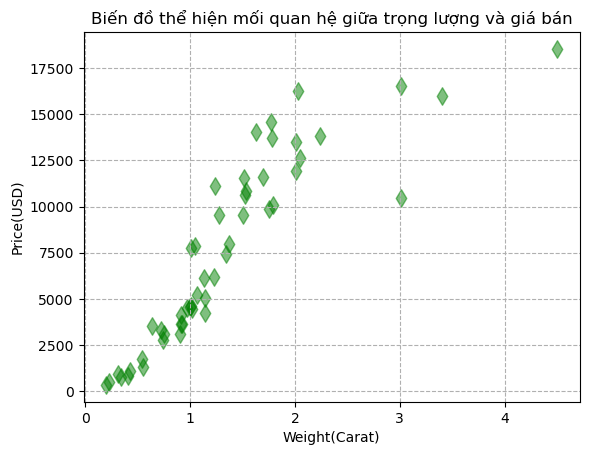

In [13]:
#Vẽ biểu đồ thể hiện mối quan hệ giữa giá bán và trọng lượng:
plt.scatter(df_diamond['Weight(Carat)'],
            df_diamond['Price(USD)'],
            marker='d',
            s=80, c='green', alpha=0.5)
plt.xlabel('Weight(Carat)')
plt.ylabel('Price(USD)')
plt.grid(ls='--')
plt.title('Biến đồ thể hiện mối quan hệ giữa trọng lượng và giá bán')
plt.show()

In [14]:
df_diamond.describe()

,Weight(Carat),Price(USD)
count,50.000000,50.000000
mean,1.344800,7550.780000
std,0.837051,5038.766934
min,0.200000,345.000000
25%,0.902500,3560.750000
50%,1.140000,6796.000000
75%,1.737500,11452.500000
max,4.500000,18531.000000


**Xác định đầu vào X - đầu ra y của mô hình:**
- 1. Đầu vào - Biến độc lập X: 1 thuộc tính
    * Weight(Carat): trọng lượng của viên kim cương
- 2. Đầu ra - Biến phụ thuộc y: 1 thuộc tính
    * Price(USD): giá

--> Tập dữ liệu Diamond là tập dữ liệu có gán nhãn

In [15]:
#Tìm hiểu chi tiết thuộc tính đầu ra y
df_diamond['Price(USD)'].unique()

array([  484,   942,   345,  4459, 14022,  4212, 11925,  9548, 11605,
        4642,  3541,  4504, 13691, 15964, 10453, 11560,  7979,  9533,
        1723,  3344,  6133, 13827, 16538, 18531,  3625,  7879,  1319,
        2761,  3620,  6165, 10640,  4138,  1094, 11130, 14561, 10108,
       12654, 16280, 13498,  4586,  3105,  7745,  5047, 10830,   765,
         827,  3120,  5220,  7427,  9890], dtype=int64)

In [16]:
df_diamond['Price(USD)'].describe()

count       50.000000
mean      7550.780000
std       5038.766934
min        345.000000
25%       3560.750000
50%       6796.000000
75%      11452.500000
max      18531.000000
Name: Price(USD), dtype: float64

**Nhận xét:**
- Biến đầu ra y có thể nhận rất nhiều các giá trị khác nhau
- Biến y là vô hạn và liên tục

**Kết luận:**
--
Tập dữ liệu diamond là tập dữ liệu có gán nhãn --> sử dụng lớp thuật toán Học Có giám sát --> y là vô hạn thuộc bài toán Hồi Quy


**Bài tập**

Sinh viên thực hiện tương tự như trên với 2 tập dữ liệu còn lại: 
comment
housing

## Bài 4: Tập dữ liệu Comment

In [17]:
df_cmt = pd.read_csv('Data/Data_Comment.csv')
df_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14477 entries, 0 to 14476
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    14477 non-null  object
 1   Sentiment  14477 non-null  object
dtypes: object(2)
memory usage: 226.3+ KB


In [19]:
df_cmt.sample(5)

,Comment,Sentiment
2594,@united that would have been nice earlier tod...,negative
12631,.@AmericanAir No. I watched these bags be aban...,negative
309,@VirginAmerica is saving my sanity right now: ...,neutral
13229,@AmericanAir thanks hoping that by wed I can ...,positive
11579,@USAirways I'm sick of living in an airport!! ...,negative


In [21]:
df_cmt.describe()

,Comment,Sentiment
count,14477,14477
unique,14401,3
top,@united thanks,negative
freq,6,9080


In [22]:
df_cmt['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [23]:
df_cmt['Sentiment'].value_counts()

negative    9080
neutral     3060
positive    2337
Name: Sentiment, dtype: int64

## Bài 5: Tập dữ liệu Housing

In [25]:
df_housing = pd.read_csv('Data/Data_Housing.csv')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   mainroad          545 non-null    object
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   parking           545 non-null    int64 
 7   furnishingstatus  545 non-null    object
 8   price             545 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [26]:
df_housing.sample(5)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
369,3600,2,1,yes,no,no,0,furnished,3675000
42,6480,3,2,yes,no,no,2,unfurnished,7700000
300,4079,3,1,yes,no,no,0,semi-furnished,4200000
277,10360,2,1,yes,no,no,1,semi-furnished,4305000
521,3635,2,1,no,no,no,0,unfurnished,2408000


In [27]:
df_housing['price'].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425